# ET Model Data Graphed


### This is all about AWS Cloud S3 Buckets

#### Our Bucket is called - 

# ga-et-data

### Sponsored by the friendly Aussies

Lots of creative ways to access this data in the bucket

A few are depicted below

This notebook talks about the 

## Cloud_Veg_ET Data

This used to live in a `socially distanced NETAPP`!
### Socially Distanced Data is SAD :-(

### Free

But Now its free to move around the country and talk to all scientists.

---

---

---

## Because there is an s3fs mount I can use *ls*

In [1]:
!ls /mnt/ga-et-data/

Cloud_Veg_ET  MODIS_NDVI  a.tif  inputsv0  lunch  readme-bucket.md  steffi


# Cloud_Veg_ET

1. This "Directory" contains aligned rasters 
2. These are pickled numpy 2D arrays
3. These will be used to develop the model prototype for the Delaware River Region - more on that later

In [2]:
# no soils data yet - but ist on its way - Thankyou Norm Bliss and Steffi
! ls /mnt/ga-et-data/Cloud_Veg_ET/Data/

ETO  NDVI  PPT	TAVG  TMAX  TMIN


In [3]:
! du -hd 1 /mnt/ga-et-data/Cloud_Veg_ET/Data/

8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/ETO
122G	/mnt/ga-et-data/Cloud_Veg_ET/Data/NDVI
265G	/mnt/ga-et-data/Cloud_Veg_ET/Data/PPT
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TAVG
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TMAX
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TMIN
419G	/mnt/ga-et-data/Cloud_Veg_ET/Data/


In [4]:
import subprocess
def subprocess_cmd(command):
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    proc_stdout = process.communicate()[0].strip()
    stupidBytesObject = proc_stdout
    outStr = (stupidBytesObject.decode("utf-8"))
    print(outStr)
    return(outStr)

In [5]:
cmd = 'du -hd 1 /mnt/ga-et-data/Cloud_Veg_ET/Data/'
du_cmd_output = subprocess_cmd(cmd)


8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/ETO
122G	/mnt/ga-et-data/Cloud_Veg_ET/Data/NDVI
265G	/mnt/ga-et-data/Cloud_Veg_ET/Data/PPT
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TAVG
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TMAX
8.3G	/mnt/ga-et-data/Cloud_Veg_ET/Data/TMIN
419G	/mnt/ga-et-data/Cloud_Veg_ET/Data/


In [6]:
def proc_du(du_in):
    size_dict={}
    lines = du_in.split('\n')
    for line in lines:
        #print('LINE ', line)
        key = line.split('/')[-1]
        # print(key)
        gigs = line.split('G')[0]
        gigs = float(gigs)
        # print(gigs)
        if (key == ''):
            key = 'TOTAL'
        size_dict[key]=gigs
    return size_dict

In [7]:
du_dict = proc_du(du_cmd_output)

In [8]:
du_dict

{'ETO': 8.3,
 'NDVI': 122.0,
 'PPT': 265.0,
 'TAVG': 8.3,
 'TMAX': 8.3,
 'TMIN': 8.3,
 'TOTAL': 419.0}

In [9]:
import pandas as pd


df = pd.DataFrame(du_dict, index=['gigs'])

In [10]:
df

,ETO,NDVI,PPT,TAVG,TMAX,TMIN,TOTAL
gigs,8.3,122.0,265.0,8.3,8.3,8.3,419.0


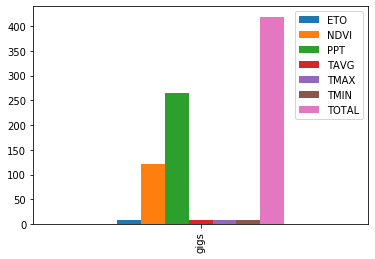

In [11]:
df.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faac3cb0160>,
      dtype=object)

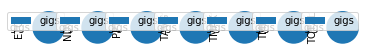

In [12]:
df.plot.pie(subplots=True)

In [13]:
df2 = df.T  # transpose

In [14]:
df2

,gigs
ETO,8.3
NDVI,122.0
PPT,265.0
TAVG,8.3
TMAX,8.3
TMIN,8.3
TOTAL,419.0


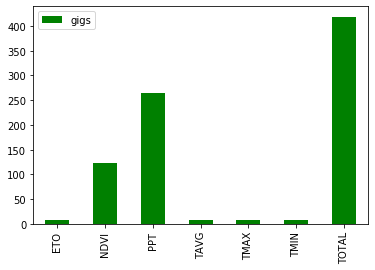

In [15]:
df2.plot.bar(color='green')

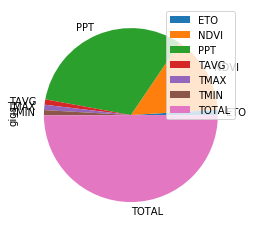

In [16]:
df2.plot.pie(y='gigs')

In [17]:
last_row = len(df2)-1
df3 = df2.drop(df2.index[last_row]) 

In [18]:
df3

,gigs
ETO,8.3
NDVI,122.0
PPT,265.0
TAVG,8.3
TMAX,8.3
TMIN,8.3


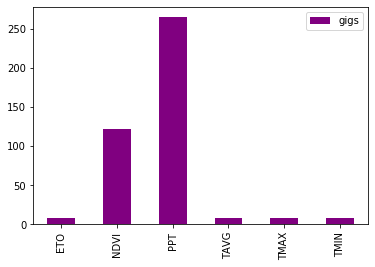

In [19]:
df3.plot.bar(color='purple')

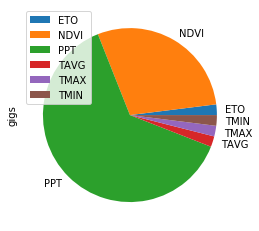

In [20]:
df3.plot.pie(y='gigs')

In [21]:
! aws s3 ls ga-et-data/Cloud_Veg_ET/Data/ETO/ |grep npy | wc

    366    1464   20130


In [22]:
! df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            3.8G     0  3.8G   0% /dev
tmpfs           773M  764K  772M   1% /run
/dev/nvme0n1p1   39G   17G   22G  44% /
tmpfs           3.8G     0  3.8G   0% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           3.8G     0  3.8G   0% /sys/fs/cgroup
/dev/loop0       18M   18M     0 100% /snap/amazon-ssm-agent/1566
/dev/loop1       89M   89M     0 100% /snap/core/7270
/dev/loop2       18M   18M     0 100% /snap/amazon-ssm-agent/1480
/dev/loop3       92M   92M     0 100% /snap/core/8689
tmpfs           773M     0  773M   0% /run/user/1000
s3fs            256T     0  256T   0% /mnt/ga-et-data
